In [1]:
#EDA - ANBERD and GDP data

In [192]:
# The following dataset conducts an exploratory data analysis of the ANBERD dataset and GDP data to determine the relationship 
# between R&D expenditure and economic growth. Upon studying the trends of R&D expenditure per industry the top four 
# countries, China, US, Japan, and Germany, with the highest expenditure were selected for further analysis.
#Methods of correlation included in the dataset are linear regression models, and Pearson, Kendall, Spearman tests.
#Other statistical methods are the normalization of the data.
#The last part of the EDA explores the UK, Korea, Italy, and France. 

In [4]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn import preprocessing
from statsmodels.tsa.stattools import adfuller

In [5]:
#loading GDP dataset from worldbank
dfGDP = pd.read_csv('GDP_USGEJaCh.csv', skiprows = 4)
dfGDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,China,CHN,Unemployment with basic education (% of total ...,SL.UEM.BASC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,China,CHN,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,China,CHN,"Unemployment, youth male (% of male labor forc...",SL.UEM.1524.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.125500e+01,1.142700e+01,1.157900e+01,1.140900e+01,1.124100e+01,1.087600e+01,1.152000e+01,1.281500e+01,1.204500e+01,NaN
3,China,CHN,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.858342e+08,7.891342e+08,7.923132e+08,7.942356e+08,7.946242e+08,7.944806e+08,7.955729e+08,7.894802e+08,7.913826e+08,NaN
4,China,CHN,"Part time employment, female (% of total femal...",SL.TLF.PART.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#cleaning

In [7]:
dfGDP3 = dfGDP[dfGDP["Indicator Name"].str.contains("current international")]
dfGDP4 = dfGDP3[dfGDP3["Indicator Name"].str.contains("GDP per capita")]

In [8]:
dfGDP5 = dfGDP4[["Country Name", "Country Code", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]

In [9]:
dfGDP6 = dfGDP5.melt(id_vars=["Country Name", "Country Code"], 
        var_name="Time", 
        value_name="GDP")

In [10]:
dfGDP6 = dfGDP6.rename(columns={"Country Name": "Country"})

In [11]:
#line plot of GDP per country betweeen 2012 and 2020

In [12]:
def gdptrend(country:str, group:str, columnlist:list, sumby:str):
    df = dfGDP6[(dfGDP6.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)
    

China
Germany
Japan
United States


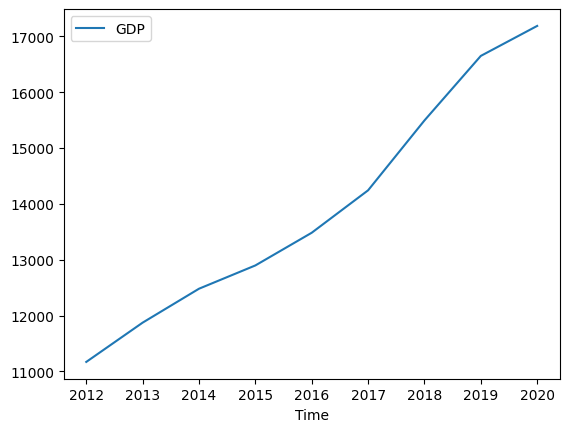

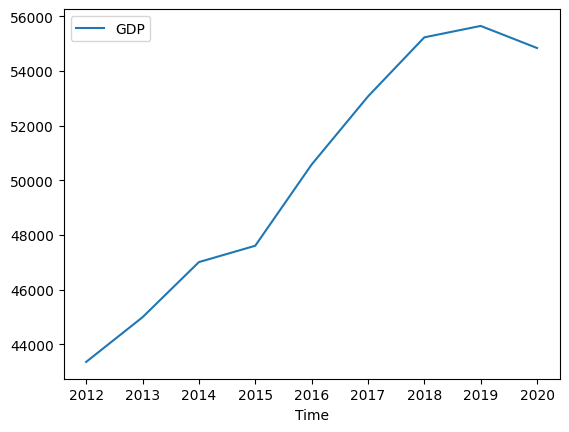

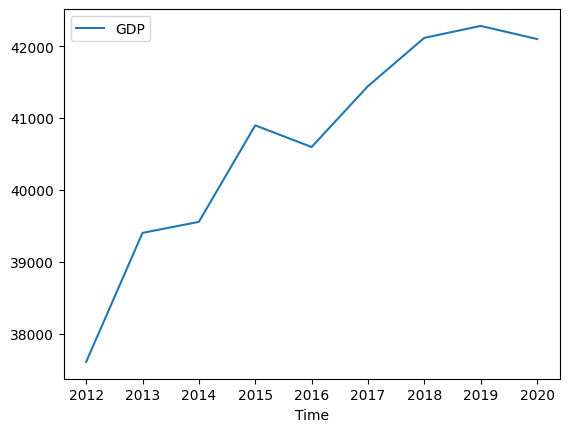

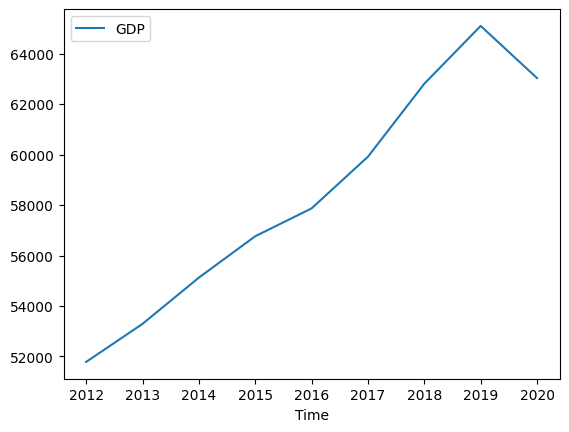

In [13]:
#gdptrend(country="Germany", group="Time", columnlist=["Time","GDP"], sumby="GDP")
for i in dfGDP6.Country.unique():
    gdptrend(country=i, group="Time", columnlist=["Time","GDP"], sumby="GDP")
    print(i)

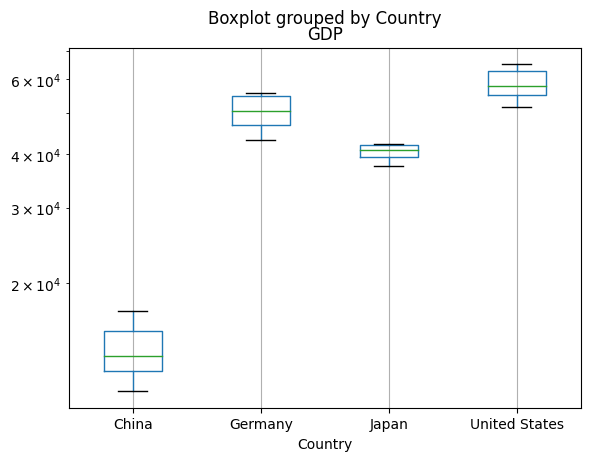

In [14]:
#boxplot of GDP per country between 2012 and 2020
dfGDP6.boxplot(column = "GDP", by='Country')
plt.semilogy();

In [15]:
df2 = pd.read_csv('ANBERD_US.csv')
df2.head()

,LOCATION,Country,CRITERIA,Classification criteria,CUR,Measure,IND,Industry,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2012,2012,USD,US Dollar,0,Units,NaN,NaN,11975132395,E,Estimated value
1,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2013,2013,USD,US Dollar,0,Units,NaN,NaN,13025429530,NaN,NaN
2,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2014,2014,USD,US Dollar,0,Units,NaN,NaN,12203989630,E,Estimated value
3,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2015,2015,USD,US Dollar,0,Units,NaN,NaN,11304470541,NaN,NaN
4,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2016,2016,USD,US Dollar,0,Units,NaN,NaN,11835383174,E,Estimated value


In [16]:
#basic information about columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25469 entries, 0 to 25468
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LOCATION                 25469 non-null  object 
 1   Country                  25469 non-null  object 
 2   CRITERIA                 25469 non-null  object 
 3   Classification criteria  25469 non-null  object 
 4   CUR                      25469 non-null  object 
 5   Measure                  25469 non-null  object 
 6   IND                      25469 non-null  object 
 7   Industry                 25469 non-null  object 
 8   TIME                     25469 non-null  int64  
 9   Time                     25469 non-null  int64  
 10  Unit Code                25469 non-null  object 
 11  Unit                     25469 non-null  object 
 12  PowerCode Code           25469 non-null  int64  
 13  PowerCode                25469 non-null  object 
 14  Reference Period Code 

In [17]:
#identifying countries 
df2['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye',
       'United Kingdom', 'United States', 'Argentina', 'Chile',
       "China (People's Republic of)", 'Estonia', 'Israel', 'Romania',
       'Singapore', 'Slovenia', 'Chinese Taipei', 'Lithuania', 'Latvia',
       'Luxembourg'], dtype=object)

In [18]:
#identifying time 
df2['Time'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [19]:
#finding null values
df2.isnull().sum()
#Reference Period Code, Reference Period, Flag Codes, Flags can be dropped 

LOCATION                       0
Country                        0
CRITERIA                       0
Classification criteria        0
CUR                            0
Measure                        0
IND                            0
Industry                       0
TIME                           0
Time                           0
Unit Code                      0
Unit                           0
PowerCode Code                 0
PowerCode                      0
Reference Period Code      25469
Reference Period           25469
Value                          0
Flag Codes                 22362
Flags                      22362
dtype: int64

In [20]:
df2 = df2[["LOCATION", "Country", "Industry", "Time", "Value"]]
df2.head()

,LOCATION,Country,Industry,Time,Value
0,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2012,11975132395
1,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2013,13025429530
2,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2014,12203989630
3,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2015,11304470541
4,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2016,11835383174


In [21]:
df2["Industry"] = df2['Industry'].str.capitalize()
df2.head()

,LOCATION,Country,Industry,Time,Value
0,AUS,Australia,Total business enterprise,2012,11975132395
1,AUS,Australia,Total business enterprise,2013,13025429530
2,AUS,Australia,Total business enterprise,2014,12203989630
3,AUS,Australia,Total business enterprise,2015,11304470541
4,AUS,Australia,Total business enterprise,2016,11835383174


<AxesSubplot: xlabel='Country'>

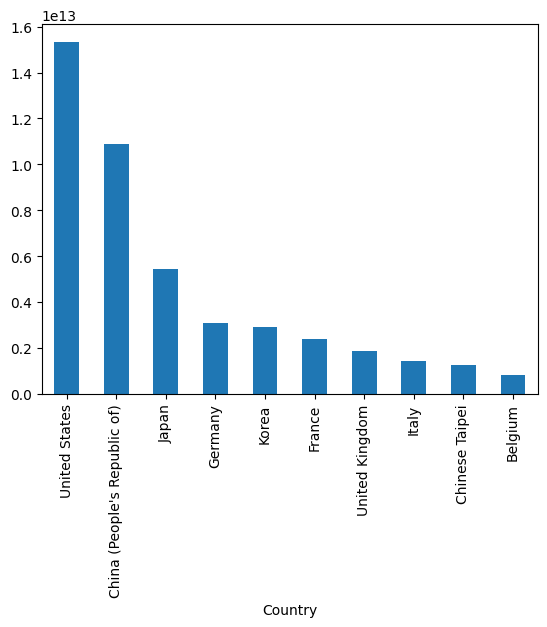

In [22]:
#plotting R&D expenditure per country, top ten 
df2.groupby('Country')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

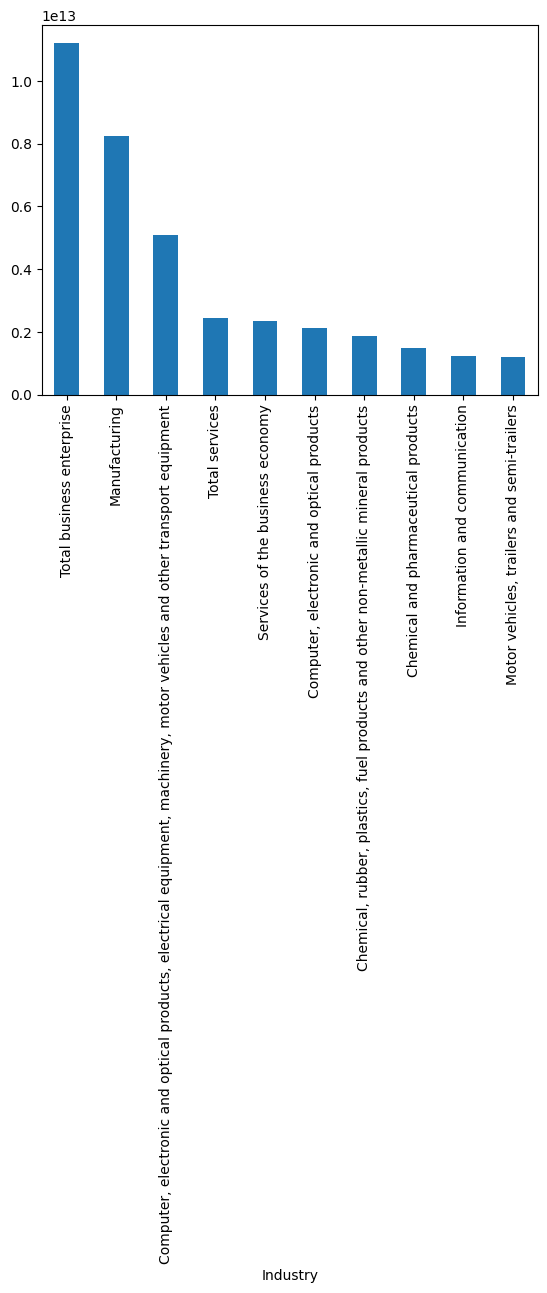

In [23]:
#plotting R&D expenditure per industry, top ten 
df2.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Time'>

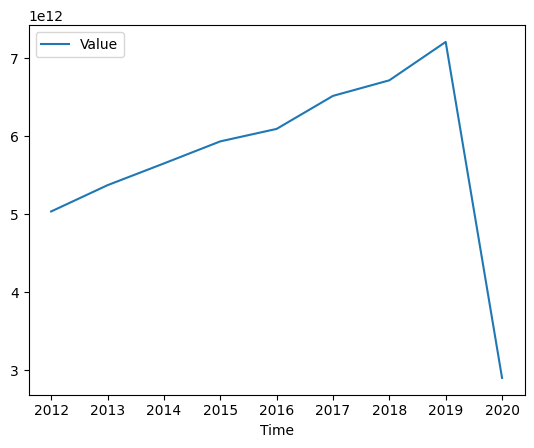

In [24]:
#plotting R&D expenditure over time 
df2_line = df2[["Time", "Value"]].groupby("Time").sum("Value")
df2_line.plot()

In [25]:
#filtering for top four countries
df3 = df2.loc[df2["Country"].isin(["Germany", "Japan", "China (People's Republic of)", "United States"])]


In [26]:
def exptrend(country:str, group:str, columnlist:list, sumby:str):
    df = df3[(df3.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

Germany
Japan
United States
China (People's Republic of)


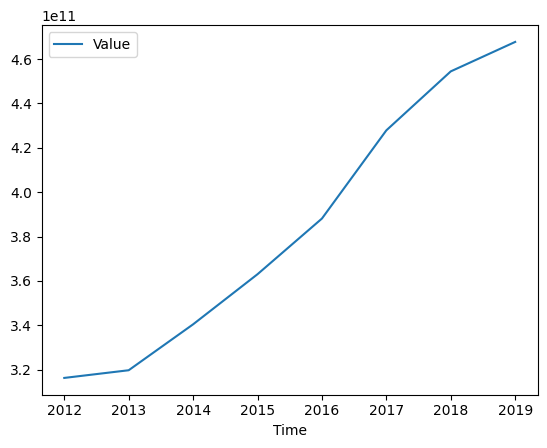

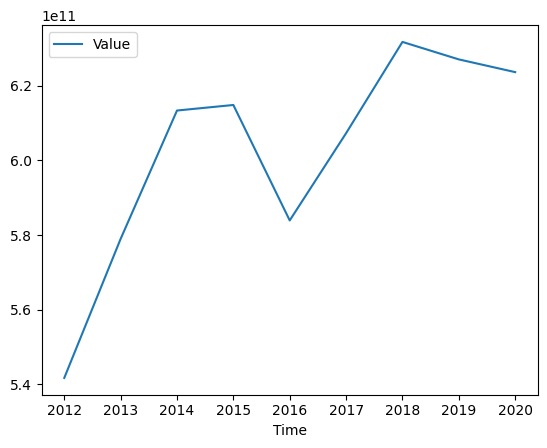

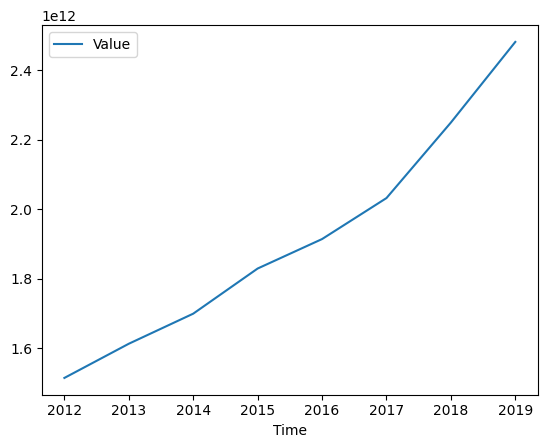

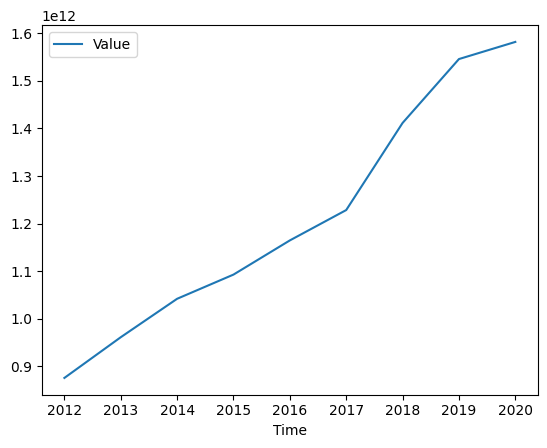

In [27]:
#line plot R&D expenditure for China, Germany, Japan, and US
for i in df3.Country.unique():
    exptrend(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

In [28]:
Ch = df3.loc[df3["Country"].isin(["China (People's Republic of)"])]
US = df3.loc[df3["Country"].isin(["United States"])]
Ge = df3.loc[df3["Country"].isin(["Germany"])]
Jap = df3.loc[df3["Country"].isin(["Japan"])]

In [29]:
#bar plot of R&D expenditure per Industry for US, Japan, Germany, China between 2012 and 2020

<AxesSubplot: xlabel='Industry'>

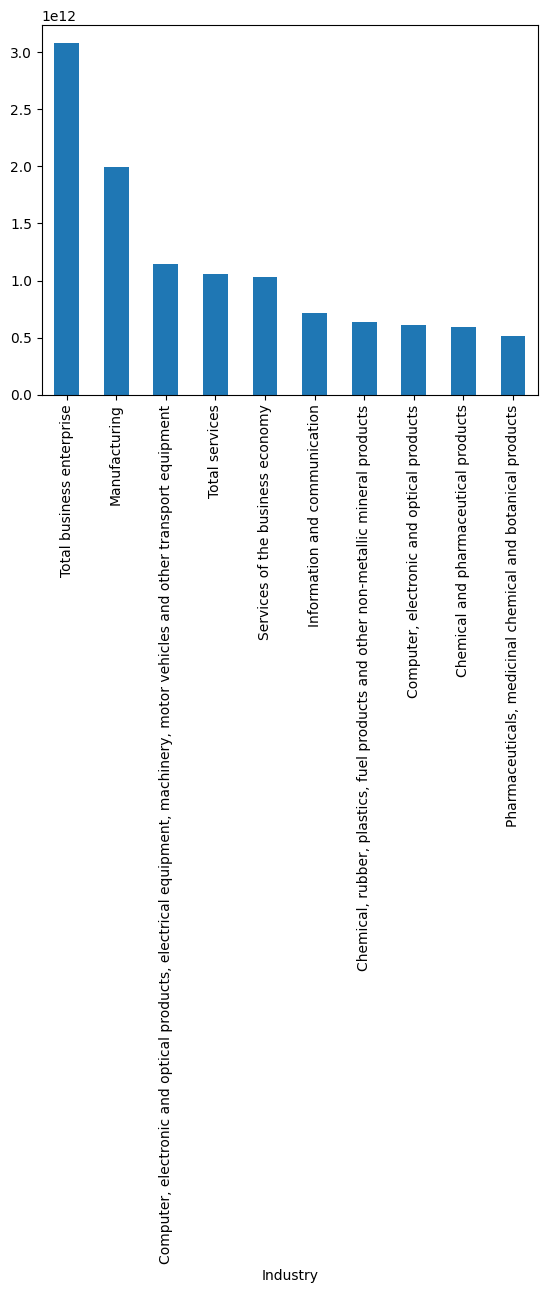

In [30]:
US.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

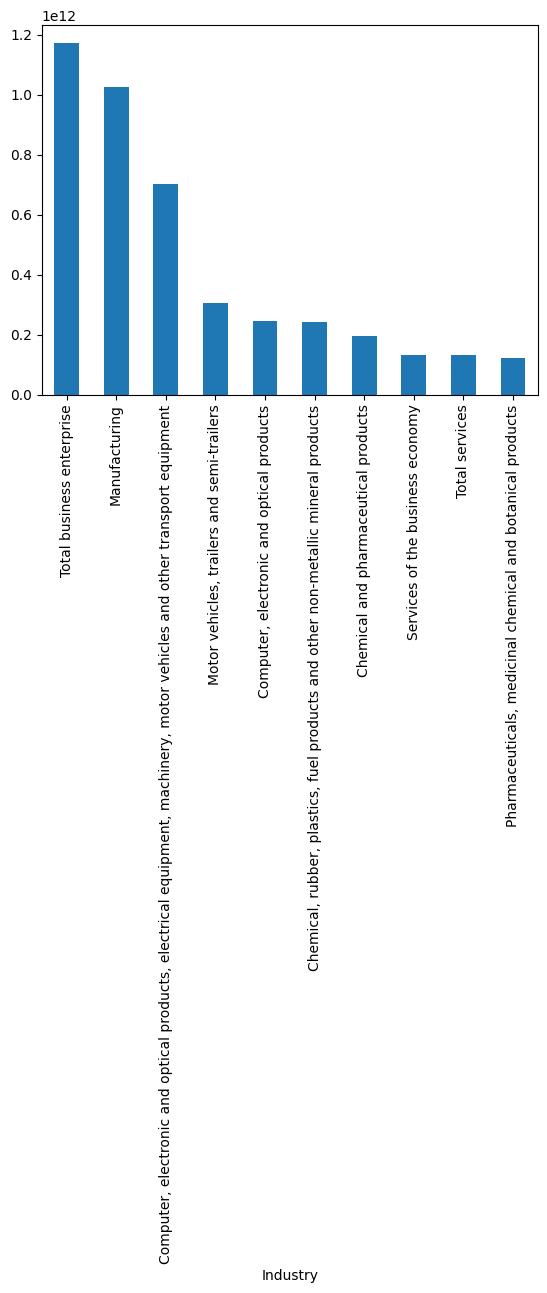

In [31]:
Jap.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

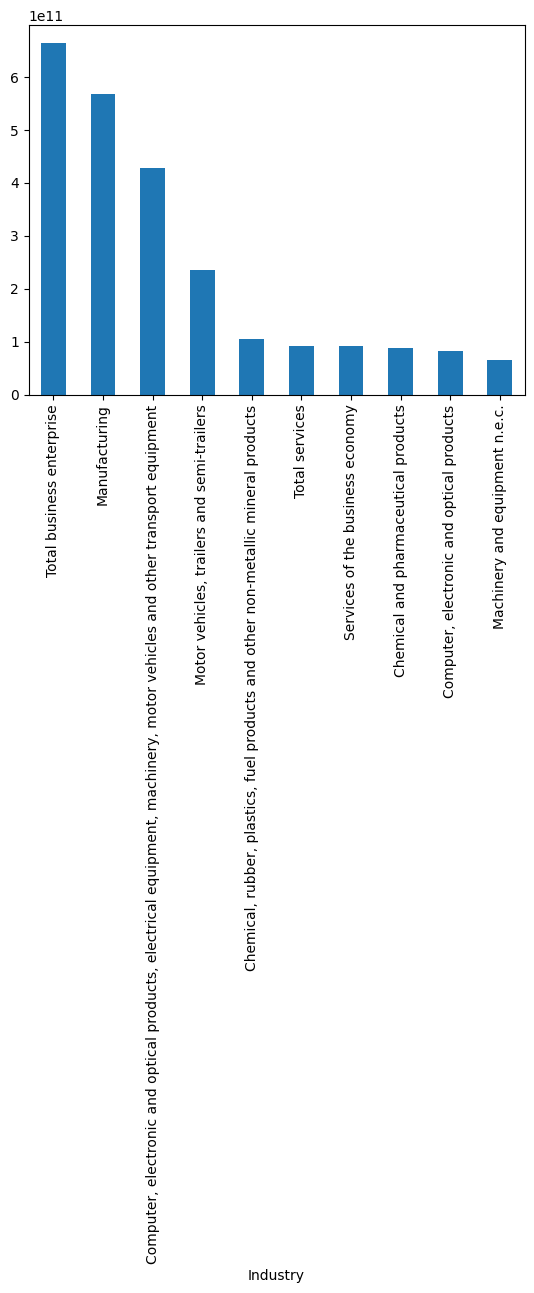

In [32]:
Ge.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

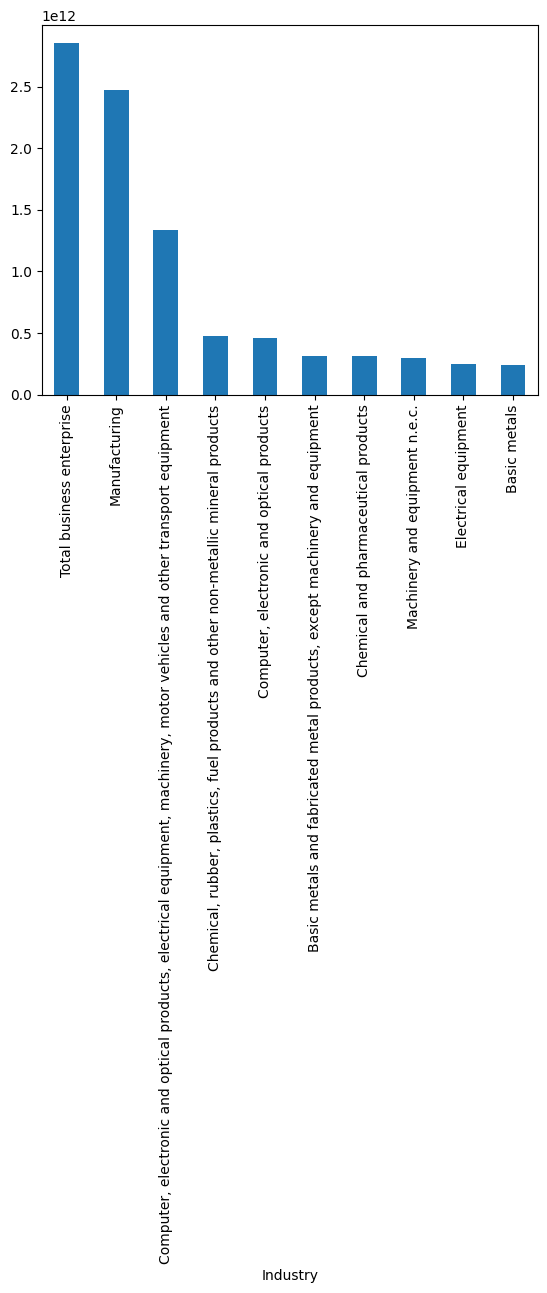

In [33]:
Ch.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

In [34]:
#boxplot of R&D expenditure per industry of China, Japan, Germany and US between 2012 and 2020 on a log scale

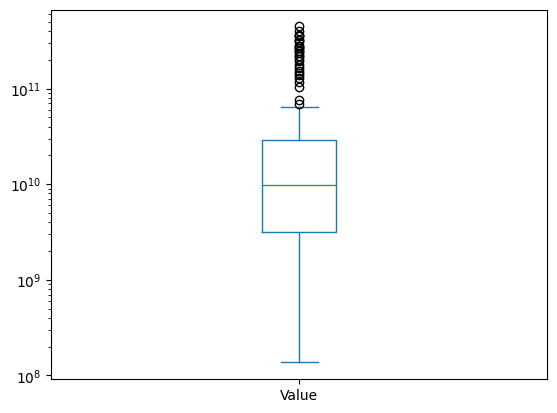

In [35]:
Ch['Value'].plot(kind='box')
plt.semilogy();

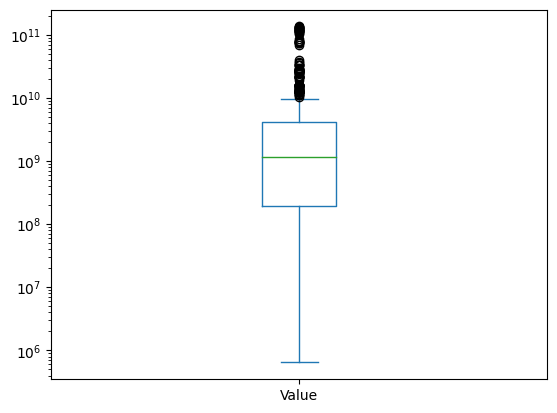

In [36]:
Jap['Value'].plot(kind='box')
plt.semilogy();

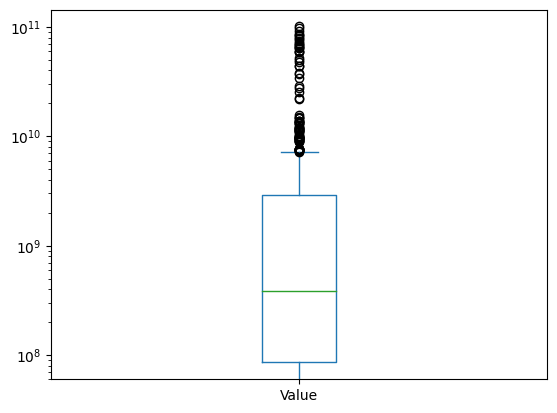

In [37]:
Ge['Value'].plot(kind='box')
plt.semilogy();

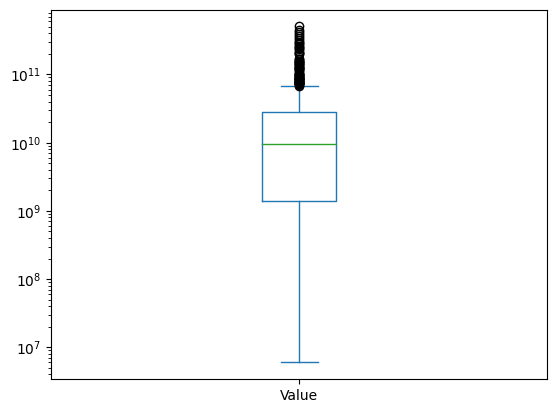

In [38]:
US['Value'].plot(kind='box')
plt.semilogy();

In [39]:
#linear regression model for Germany

In [40]:
#calculating annual R&D expenditure and then differences between years
Ge["R&D_Exp"] = Ge["Value"]
dfGEExp = Ge.groupby("Time").sum('Value').reset_index()
dfGEExp['DifExp'] = dfGEExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\3497175680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ge["R&D_Exp"] = Ge["Value"]


In [41]:
#dropping GDP in 2020 and calculating differences between years
dfGEGDP = dfGDP6.loc[dfGDP6["Country"].isin(["Germany"])].reset_index()
dfGEGDP = dfGEGDP[:-1]
dfGEGDP['DifGDP'] = dfGEGDP['GDP'].shift(1)

In [42]:
#choosing same data type for merge column
dfGEGDP["Time"]=dfGEGDP["Time"].astype("int64")
dfGEExp["Time"]=dfGEExp["Time"].astype("int64")

In [43]:
#merging GDP and Exp data
mergedGEExpGDP = dfGEGDP.merge(dfGEExp, on="Time")

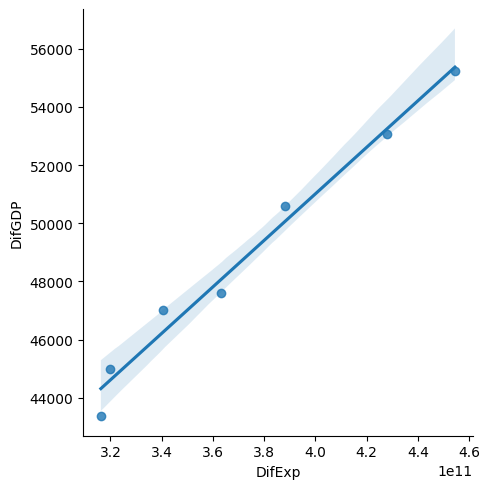

In [44]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedGEExpGDP)

In [45]:
indep = dfGEExp[["DifExp"]]
dep = dfGEGDP[[ "DifGDP"]]

In [46]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2192.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    6.36e-09
Time:                        17:35:18   Log-Likelihood:                         -64.867
No. Observations:                   7   AIC:                                      131.7
Df Residuals:                       6   BIC:                                      131.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      1.301e-07   2.78e-09     46.821      0.000    1.23e-07    1.37e-07
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.355
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.649
Skew:                          -0.446   Prob(JB):                        0.723
Kurtosis:                       1.804   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Pearson, Kendall, and Spearman correlation for Germany

In [48]:
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifGDP:
    T.append(row)

In [49]:
pearsonr(S,T)

PearsonRResult(statistic=0.9902176578839788, pvalue=1.8083446820152593e-05)

In [50]:
spearmanr(S,T)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [51]:
kendalltau(S,T)

KendalltauResult(correlation=1.0, pvalue=0.0003968253968253968)

In [52]:
#ADF test 

In [53]:
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.771409
p-value: 0.998291
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


In [54]:
#rerunning Germany after normalization

In [55]:
dfGEGDPn = dfGEGDP.iloc[1:]
dfGEExpn = dfGEExp.iloc[1:]
normalized_dfGEGDP = preprocessing.normalize([dfGEGDPn["GDP"]])
normalized_dfGEExp = preprocessing.normalize([dfGEExpn["DifExp"]])

In [56]:
normalized_dfGEGDPl = list(np.concatenate(normalized_dfGEGDP))
normalized_dfGEExpl = list(np.concatenate(normalized_dfGEExp))

In [57]:
X = normalized_dfGEGDPl
y = normalized_dfGEExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1670.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    1.44e-08
Time:                        17:35:18   Log-Likelihood:                          16.592
No. Observations:                   7   AIC:                                     -31.18
Df Residuals:                       6   BIC:                                     -31.24
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9982      0.024     40.866      0.000       0.938       1.058
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.439
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.984
Skew:                           0.893   Prob(JB):                        0.611
Kurtosis:                       2.569   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
pearsonr(X,y)

PearsonRResult(statistic=0.9716263530660686, pvalue=0.00025651232283820346)

In [59]:
spearmanr(X,y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [60]:
kendalltau(X,y)

KendalltauResult(correlation=1.0, pvalue=0.0003968253968253968)

In [61]:
#linear regression for US

In [62]:
#calculating annual R&D expenditure and then differences between years
US["R&D_Exp"] = US["Value"]
dfUSExp = US.groupby("Time").sum('Value').reset_index()
dfUSExp['DifExp'] = dfUSExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\3837538788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US["R&D_Exp"] = US["Value"]


In [63]:
#calculating differences between years, dropping 2020 bc no annual R&D
dfUSGDP = dfGDP6.loc[dfGDP6["Country"].isin(["United States"])].reset_index()
dfUSGDP = dfUSGDP[:-1]
dfUSGDP['DifGDP'] = dfUSGDP['GDP'].shift(1)

In [64]:
#choosing same data type for merge column
dfUSGDP["Time"]=dfUSGDP["Time"].astype("int64")
dfUSExp["Time"]=dfUSExp["Time"].astype("int64")

In [65]:
#merging GDP and Exp data
mergedUSExpGDP = dfUSGDP.merge(dfUSExp, on="Time")

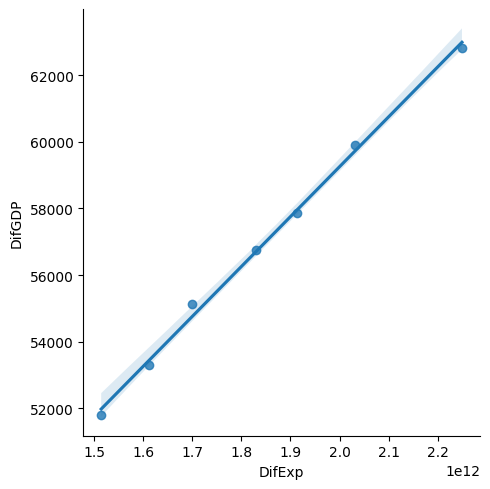

In [66]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedUSExpGDP)

In [67]:
indep = dfUSExp[["DifExp"]]
dep = dfUSGDP[[ "DifGDP"]]

In [68]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1390.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    2.48e-08
Time:                        17:35:19   Log-Likelihood:                         -67.502
No. Observations:                   7   AIC:                                      137.0
Df Residuals:                       6   BIC:                                      137.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      3.068e-08   8.23e-10     37.284      0.000    2.87e-08    3.27e-08
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.282
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                          -0.440   Prob(JB):                        0.797
Kurtosis:                       2.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Pearson, Kendall, and Spearman correlation for US

In [70]:
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifGDP:
    T.append(row)

In [71]:
pearsonr(S,T)

PearsonRResult(statistic=0.9983606603726947, pvalue=2.088068159552183e-07)

In [72]:
spearmanr(S,T)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [73]:
kendalltau(S,T)

KendalltauResult(correlation=1.0, pvalue=0.0003968253968253968)

In [74]:
#rerunning US after normalization

In [75]:
dfUSGDPn = dfUSGDP.iloc[1:]
dfUSExpn = dfUSExp.iloc[1:]
normalized_dfUSGDP = preprocessing.normalize([dfUSGDPn["GDP"]])
normalized_dfUSExp = preprocessing.normalize([dfUSExpn["DifExp"]])

In [76]:
normalized_dfUSGDPl = list(np.concatenate(normalized_dfUSGDP))
normalized_dfUSExpl = list(np.concatenate(normalized_dfUSExp))

In [77]:
X = normalized_dfUSGDPl
y = normalized_dfUSExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1538.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    1.84e-08
Time:                        17:35:19   Log-Likelihood:                          16.305
No. Observations:                   7   AIC:                                     -30.61
Df Residuals:                       6   BIC:                                     -30.66
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9981      0.025     39.219      0.000       0.936       1.060
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.368
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.382
Skew:                           0.437   Prob(JB):                        0.826
Kurtosis:                       2.261   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
pearsonr(X,y)

PearsonRResult(statistic=0.9924745115831177, pvalue=9.398043565196568e-06)

In [79]:
spearmanr(X,y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [80]:
kendalltau(X,y)

KendalltauResult(correlation=1.0, pvalue=0.0003968253968253968)

In [81]:
#linear regression for China

In [82]:
#calculating annual R&D expenditure and then differences between years
Ch["R&D_Exp"] = Ch["Value"]
dfChExp = Ch.groupby("Time").sum('Value').reset_index()
dfChExp['DifExp'] = dfChExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\3225019744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ch["R&D_Exp"] = Ch["Value"]


In [83]:
#calculating differences between years
dfChGDP = dfGDP6.loc[dfGDP6["Country"].isin(["China"])].reset_index()
dfChGDP['DifGDP'] = dfChGDP['GDP'].shift(1)

In [84]:
#choosing same data type for merge column
dfChGDP["Time"]=dfChGDP["Time"].astype("int64")
dfChExp["Time"]=dfChExp["Time"].astype("int64")

In [85]:
#merging GDP and Exp data
mergedChExpGDP = dfChGDP.merge(dfChExp, on="Time")

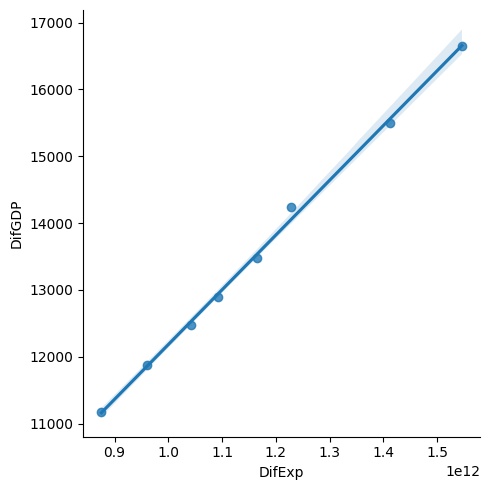

In [86]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedChExpGDP)

In [87]:
indep = dfChExp[["DifExp"]]
dep = dfChGDP[[ "DifGDP"]]

In [88]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2552.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    3.12e-10
Time:                        17:35:20   Log-Likelihood:                         -63.915
No. Observations:                   8   AIC:                                      129.8
Df Residuals:                       7   BIC:                                      129.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      1.151e-08   2.28e-10     50.520      0.000     1.1e-08     1.2e-08
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.568
Skew:                          -0.513   Prob(JB):                        0.753
Kurtosis:                       2.193   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#Pearson, Kendall, and Spearman correlation for China

In [90]:
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifGDP:
    T.append(row)

In [91]:
pearsonr(S,T)

PearsonRResult(statistic=0.9990425703534394, pvalue=2.192546007082859e-09)

In [92]:
spearmanr(S,T)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [93]:
kendalltau(S,T)

KendalltauResult(correlation=0.9999999999999998, pvalue=4.96031746031746e-05)

In [94]:
#rerunning China after normalization

In [95]:
dfChGDPn = dfChGDP.iloc[1:]
dfChExpn = dfChExp.iloc[1:]
normalized_dfChGDP = preprocessing.normalize([dfChGDPn["GDP"]])
normalized_dfChExp = preprocessing.normalize([dfChExpn["DifExp"]])

In [96]:
normalized_dfChGDPl = list(np.concatenate(normalized_dfChGDP))
normalized_dfChExpl = list(np.concatenate(normalized_dfChExp))

In [97]:
X = normalized_dfChGDPl
y = normalized_dfChExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2148.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    5.69e-10
Time:                        17:35:20   Log-Likelihood:                          19.886
No. Observations:                   8   AIC:                                     -37.77
Df Residuals:                       7   BIC:                                     -37.69
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9984      0.022     46.351      0.000       0.947       1.049
==============================================================================
Omnibus:                        3.340   Durbin-Watson:                   0.576
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                0.983
Skew:                           0.857   Prob(JB):                        0.612
Kurtosis:                       3.110   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
pearsonr(X,y)

PearsonRResult(statistic=0.9853128367394707, pvalue=7.833530268755501e-06)

In [99]:
spearmanr(X,y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [100]:
kendalltau(X,y)

KendalltauResult(correlation=0.9999999999999998, pvalue=4.96031746031746e-05)

In [101]:
#linear regression for Japan

In [102]:
#calculating annual R&D expenditure and then differences between years
Jap["R&D_Exp"] = Jap["Value"]
dfJapExp = Jap.groupby("Time").sum('Value').reset_index()
dfJapExp['DifExp'] = dfJapExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\1701057406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jap["R&D_Exp"] = Jap["Value"]


In [103]:
#calculating differences between years
dfJapGDP = dfGDP6.loc[dfGDP6["Country"].isin(["Japan"])].reset_index()
dfJapGDP['DifGDP'] = dfJapGDP['GDP'].shift(1)

In [104]:
#choosing same data type for merge column
dfJapGDP["Time"]=dfJapGDP["Time"].astype("int64")
dfJapExp["Time"]=dfJapExp["Time"].astype("int64")

In [105]:
#merging GDP and Exp data
mergedJapExpGDP = dfJapGDP.merge(dfJapExp, on="Time")

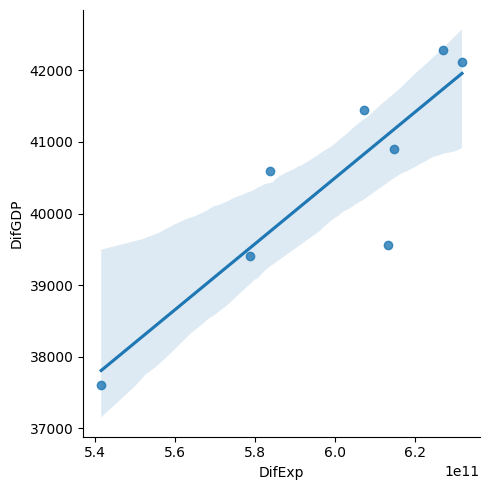

In [106]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedJapExpGDP)

In [107]:
indep = dfJapExp[["DifExp"]]
dep = dfJapGDP[[ "DifGDP"]]

In [108]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.340e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    9.47e-13
Time:                        17:35:21   Log-Likelihood:                         -65.997
No. Observations:                   8   AIC:                                      134.0
Df Residuals:                       7   BIC:                                      134.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      6.745e-08   5.83e-10    115.745      0.000    6.61e-08    6.88e-08
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.518
Skew:                          -0.582   Prob(JB):                        0.772
Kurtosis:                       2.556   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#Pearson, Kendall, and Spearman correlation for Japan

In [110]:
S = []
for row in X.DifExp:
    S.append(row)
T = []
for row in y.DifGDP:
    T.append(row)

In [111]:
pearsonr(S,T)

PearsonRResult(statistic=0.8783234365953093, pvalue=0.0041026240480944755)

In [112]:
spearmanr(S,T)

SpearmanrResult(correlation=0.8571428571428572, pvalue=0.006530017254715292)

In [113]:
kendalltau(S,T)

KendalltauResult(correlation=0.7142857142857142, pvalue=0.014136904761904762)

In [114]:
#rerunning Japan after normalization

In [115]:
dfJapGDPn = dfJapGDP.iloc[1:]
dfJapExpn = dfJapExp.iloc[1:]
normalized_dfJapGDP = preprocessing.normalize([dfJapGDPn["DifGDP"]])
normalized_dfJapExp = preprocessing.normalize([dfJapExpn["DifExp"]])

In [116]:
normalized_dfJapGDPl = list(np.concatenate(normalized_dfJapGDP))
normalized_dfJapExpl = list(np.concatenate(normalized_dfJapExp))

In [117]:
X = normalized_dfJapGDPl
y = normalized_dfJapExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.340e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    9.47e-13
Time:                        17:35:21   Log-Likelihood:                          27.196
No. Observations:                   8   AIC:                                     -52.39
Df Residuals:                       7   BIC:                                     -52.31
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9997      0.009    115.745      0.000       0.979       1.020
==============================================================================
Omnibus:                        1.181   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                0.516
Skew:                           0.581   Prob(JB):                        0.773
Kurtosis:                       2.554   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
pearsonr(X,y)

PearsonRResult(statistic=0.8783234365953091, pvalue=0.004102624048094496)

In [119]:
spearmanr(X,y)

SpearmanrResult(correlation=0.8571428571428572, pvalue=0.006530017254715292)

In [120]:
kendalltau(X,y)

KendalltauResult(correlation=0.7142857142857142, pvalue=0.014136904761904762)

In [121]:
#trend analysis and correlation for four additional countries

In [122]:
#filtering for Korea, France, UK, Italy countries
df4 = df2.loc[df2["Country"].isin(["Korea", "France", "Italy", "United Kingdom"])]
Fr = df4.loc[df4["Country"].isin(["France"])]
UK = df4.loc[df4["Country"].isin(["United Kingdom"])]
Kor = df4.loc[df4["Country"].isin(["Korea"])]
It = df4.loc[df4["Country"].isin(["Italy"])]

In [123]:
df4.head()

,LOCATION,Country,Industry,Time,Value
57,FRA,France,Total business enterprise,2012,35581406829
58,FRA,France,Total business enterprise,2013,37688592366
59,FRA,France,Total business enterprise,2014,38551276282
60,FRA,France,Total business enterprise,2015,39268701029
61,FRA,France,Total business enterprise,2016,41440754334


In [124]:
def exptrend2(country:str, group:str, columnlist:list, sumby:str):
    df = df4[(df4.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

France
Italy
Korea
United Kingdom


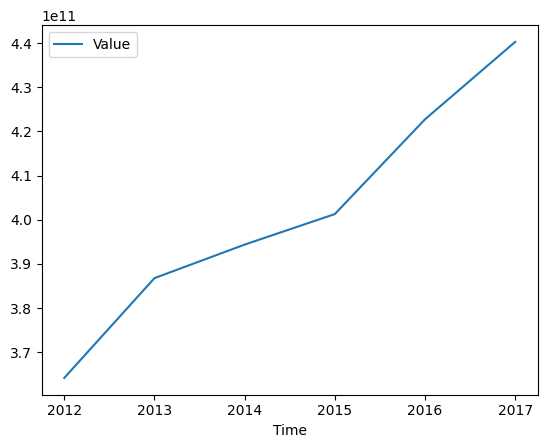

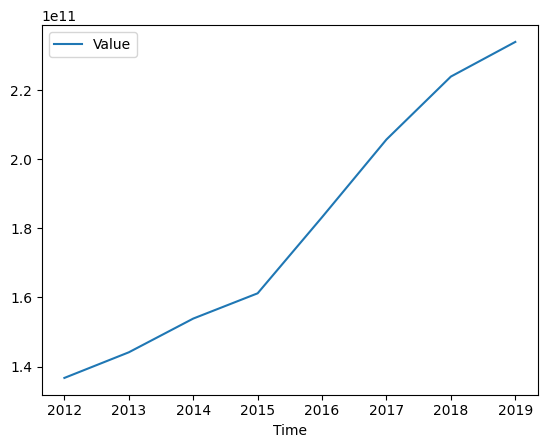

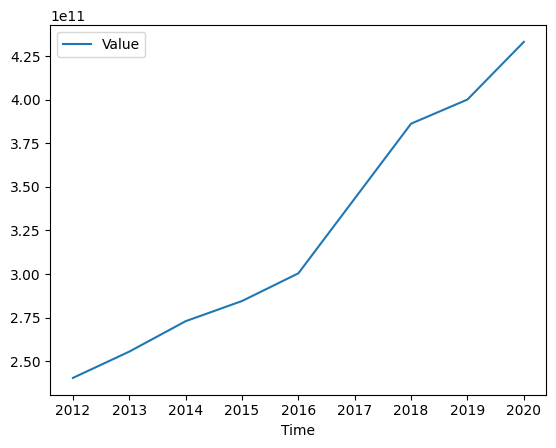

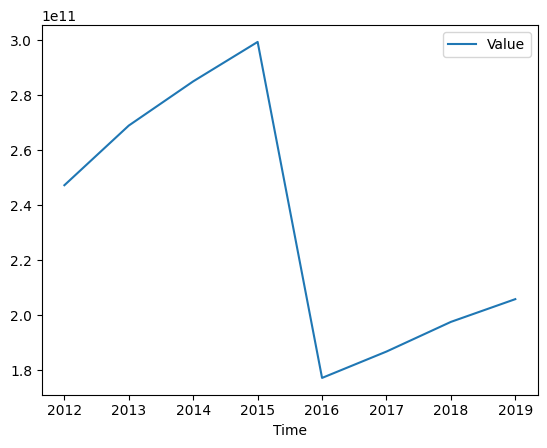

In [125]:
for i in df4.Country.unique():
    exptrend2(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

In [126]:
Fr = df4.loc[df4["Country"].isin(["France"])]
It = df4.loc[df4["Country"].isin(["Italy"])]
Kor = df4.loc[df4["Country"].isin(["Korea"])]
UK = df4.loc[df4["Country"].isin(["United Kingdom"])]

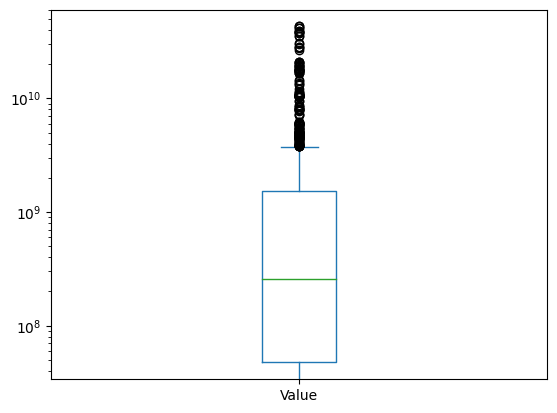

In [127]:
Fr['Value'].plot(kind='box')
plt.semilogy();

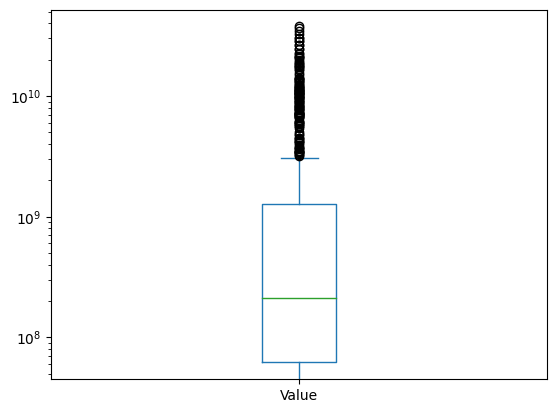

In [128]:
UK['Value'].plot(kind='box')
plt.semilogy();

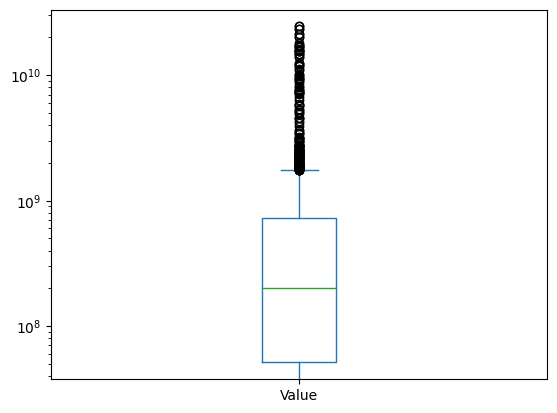

In [129]:
It['Value'].plot(kind='box')
plt.semilogy();

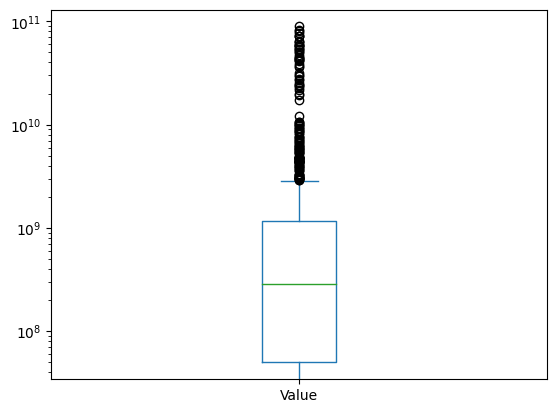

In [130]:
Kor['Value'].plot(kind='box')
plt.semilogy();

In [131]:
#loading GDP dataset from worldbank
dfGDP2 = pd.read_csv('GDP.csv', skiprows = 4)
dfGDP2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757


In [132]:
#filtering for Korea, France, UK, Italy countries
dfGDPn = dfGDP2.loc[dfGDP2["Country Name"].isin(["Korea, Rep.", "France", "Italy", "United Kingdom"])]

In [133]:
dfGDPn

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
77,France,FRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1333.881573,1430.434624,1585.735311,1758.856659,1928.999402,2060.299715,...,40870.85236,42602.71797,43068.54872,36652.92231,37062.53357,38781.04949,41557.85486,40494.89829,39055.28293,43658.97898
81,United Kingdom,GBR,GDP per capita (current US$),NY.GDP.PCAP.CD,1397.594803,1472.385714,1525.775853,1613.456884,1748.288118,1873.567774,...,42485.58607,43449.09172,47447.58893,45071.07432,41146.07736,40621.33448,43306.30830,42747.08046,40318.55757,46510.28278
116,Italy,ITA,GDP per capita (current US$),NY.GDP.PCAP.CD,804.492623,887.336745,990.260152,1126.019337,1222.544540,1304.453817,...,35051.52127,35560.08141,35565.72138,30242.38614,30960.73151,32406.72032,34622.16967,33673.75096,31911.03579,35657.49756
126,"Korea, Rep.",KOR,GDP per capita (current US$),NY.GDP.PCAP.CD,158.274637,93.831759,106.160111,146.303055,123.606837,108.723439,...,25466.76052,27182.73431,29249.57522,28732.23108,29288.87044,31616.84340,33436.92306,31902.41690,31721.29891,34997.78164


In [134]:
dfGDPn2 = dfGDPn[["Country Name", "Country Code", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
dfGDPn3 = dfGDPn2.melt(id_vars=["Country Name", "Country Code"], 
        var_name="Time", 
        value_name="GDP")
dfGDPn4 = dfGDPn3.rename(columns={"Country Name": "Country"})

In [135]:
def gdptrend2(country:str, group:str, columnlist:list, sumby:str):
    df = dfGDPn4[(dfGDPn4.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

France
United Kingdom
Italy
Korea, Rep.


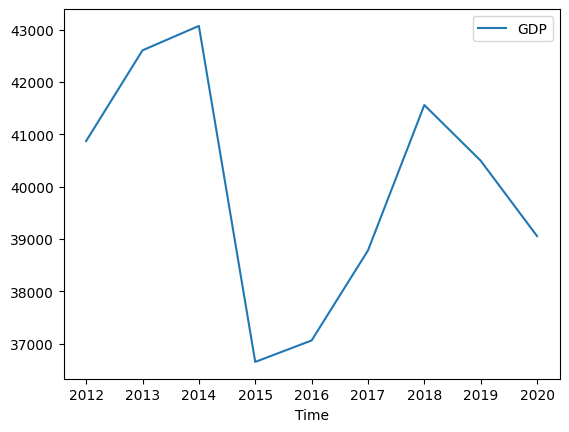

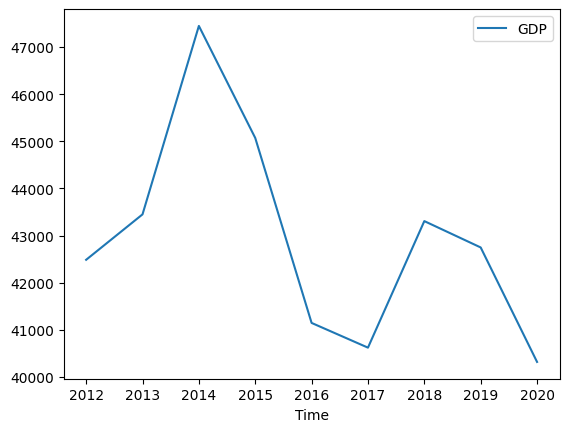

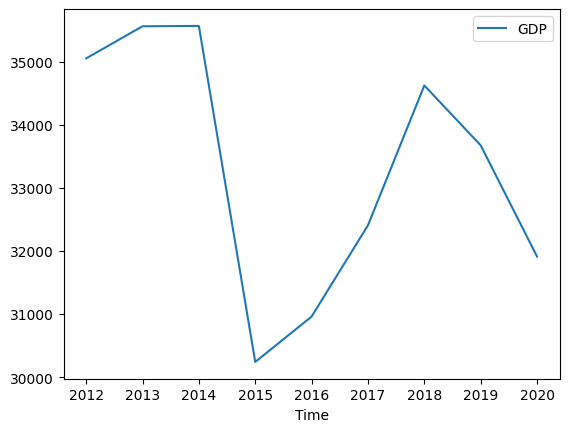

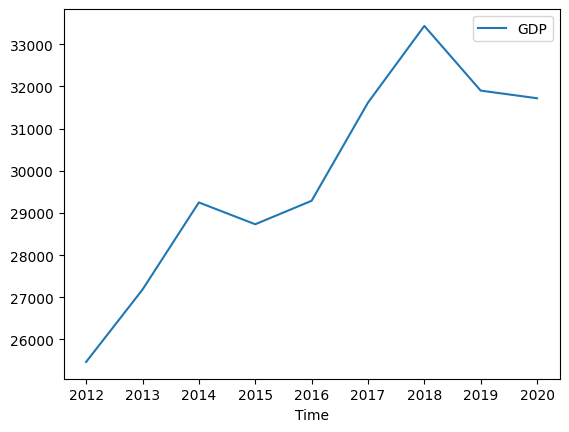

In [136]:
for i in dfGDPn4.Country.unique():
    gdptrend2(country=i, group="Time", columnlist=["Time","GDP"], sumby="GDP")
    print(i)

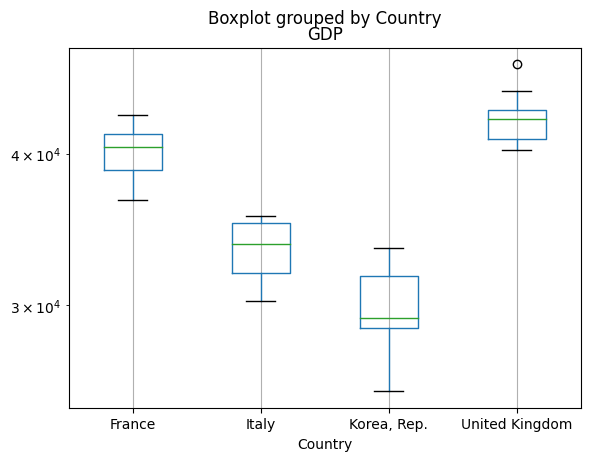

In [137]:
#boxplot of GDP per country between 2012 and 2020
dfGDPn4.boxplot(column = "GDP", by='Country')
plt.semilogy();

In [138]:
#correlation methods for France
#calculating annual R&D expenditure and then differences between years
Fr["R&D_Exp"] = Fr["Value"]
dfFRExp = Fr.groupby("Time").sum('Value').reset_index()
dfFRExp['DifExp'] = dfFRExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\890121909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fr["R&D_Exp"] = Fr["Value"]


In [139]:
#calculating differences between years
dfFrGDP = dfGDPn4.loc[dfGDPn4["Country"].isin(["France"])].reset_index()
dfFrGDP['DifGDP'] = dfFrGDP['GDP'].shift(1)
dfFrGDPt = dfFrGDP.loc[dfFrGDP["Time"].isin(["2012", "2013", "2014", "2015", "2016", "2017"])]
#choosing same data type for merge column
dfFrGDPt["Time"]=dfFrGDPt["Time"].astype("int64")
dfFRExp["Time"]=dfFRExp["Time"].astype("int64")
#merging GDP and Exp data
mergedFrExpGDP = dfFrGDPt.merge(dfFRExp, on="Time")

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\3528113105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFrGDPt["Time"]=dfFrGDPt["Time"].astype("int64")


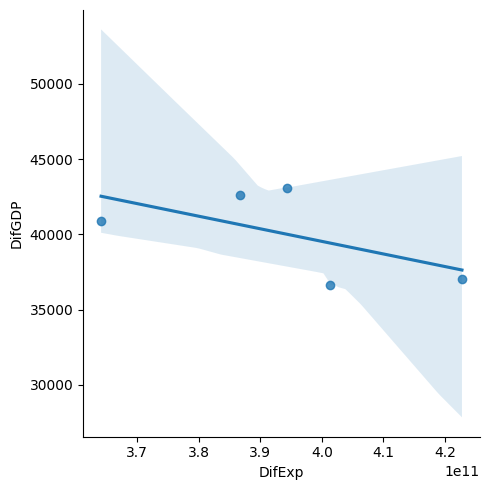

In [140]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedFrExpGDP)

In [141]:
#normalization
dfFrGDPn = dfFrGDPt.iloc[1:]
dfFRExpn = dfFRExp.iloc[1:]
normalized_dfFrGDP = preprocessing.normalize([dfFrGDPn["DifGDP"]])
normalized_dfFrExp = preprocessing.normalize([dfFRExpn["DifExp"]])
normalized_dfFrGDPl = list(np.concatenate(normalized_dfFrGDP))
normalized_dfFrExpl = list(np.concatenate(normalized_dfFrExp))

In [142]:
#linear regression
X = normalized_dfFrGDPl
y = normalized_dfFrExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              368.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    4.33e-05
Time:                        17:35:28   Log-Likelihood:                          8.2656
No. Observations:                   5   AIC:                                     -14.53
Df Residuals:                       4   BIC:                                     -14.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9946      0.052     19.204      0.000       0.851       1.138
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.622
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.774
Skew:                           0.449   Prob(JB):                        0.679
Kurtosis:                       1.295   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#other correlation tools

In [143]:
pearsonr(X,y)

PearsonRResult(statistic=-0.5890485052942909, pvalue=0.2959688053748199)

In [144]:
spearmanr(X,y)

SpearmanrResult(correlation=-0.49999999999999994, pvalue=0.39100221895577053)

In [145]:
kendalltau(X,y)

KendalltauResult(correlation=-0.19999999999999998, pvalue=0.8166666666666667)

In [146]:
#correlation methods for UK
#calculating annual R&D expenditure and then differences between years
UK["R&D_Exp"] = UK["Value"]
dfUKExp = UK.groupby("Time").sum('Value').reset_index()
dfUKExp['DifExp'] = dfUKExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\1007896906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["R&D_Exp"] = UK["Value"]


In [147]:
#calculating differences between years
dfUKGDP = dfGDPn4.loc[dfGDPn4["Country"].isin(["United Kingdom"])].reset_index()
dfUKGDP['DifGDP'] = dfUKGDP['GDP'].shift(1)
dfUKGDPt = dfUKGDP.loc[dfUKGDP["Time"].isin(["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"])]
#choosing same data type for merge column
dfUKGDPt["Time"]=dfUKGDPt["Time"].astype("int64")
dfUKExp["Time"]=dfUKExp["Time"].astype("int64")
#merging GDP and Exp data
mergedUKExpGDP = dfUKGDPt.merge(dfUKExp, on="Time")

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\3859015469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUKGDPt["Time"]=dfUKGDPt["Time"].astype("int64")


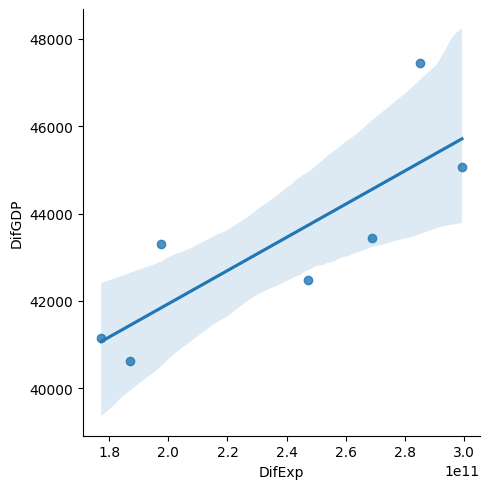

In [148]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedUKExpGDP)

In [149]:
#normalization
dfUKGDPn = dfUKGDPt.iloc[1:]
dfUKExpn = dfUKExp.iloc[1:]
normalized_dfUKGDP = preprocessing.normalize([dfUKGDPn["DifGDP"]])
normalized_dfUKExp = preprocessing.normalize([dfUKExpn["DifExp"]])
normalized_dfUKGDPl = list(np.concatenate(normalized_dfUKGDP))
normalized_dfUKExpl = list(np.concatenate(normalized_dfUKExp))

In [150]:
#linear regression
X = normalized_dfUKGDPl
y = normalized_dfUKExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              247.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    4.19e-06
Time:                        17:43:02   Log-Likelihood:                          9.9787
No. Observations:                   7   AIC:                                     -17.96
Df Residuals:                       6   BIC:                                     -18.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9881      0.063     15.727      0.000       0.834       1.142
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.167
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.786
Skew:                          -0.068   Prob(JB):                        0.675
Kurtosis:                       1.365   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#other correlation methods

In [151]:
pearsonr(X,y)

PearsonRResult(statistic=0.8116602100139053, pvalue=0.026639256166562243)

In [152]:
spearmanr(X,y)

SpearmanrResult(correlation=0.8928571428571429, pvalue=0.006807187408935393)

In [153]:
kendalltau(X,y)

KendalltauResult(correlation=0.7142857142857143, pvalue=0.03015873015873016)

In [164]:
#correlation methods for Italy
#calculating annual R&D expenditure and then differences between years
It["R&D_Exp"] = It["Value"]
dfItExp = It.groupby("Time").sum('Value').reset_index()
dfItExp['DifExp'] = dfItExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\2289756015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  It["R&D_Exp"] = It["Value"]


In [165]:
#calculating differences between years
dfItGDP = dfGDPn4.loc[dfGDPn4["Country"].isin(["Italy"])].reset_index()
dfItGDP['DifGDP'] = dfItGDP['GDP'].shift(1)
dfItGDPt = dfItGDP.loc[dfItGDP["Time"].isin(["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"])]
#choosing same data type for merge column
dfItGDPt["Time"]=dfItGDPt["Time"].astype("int64")
dfItExp["Time"]=dfItExp["Time"].astype("int64")
#merging GDP and Exp data
mergedItExpGDP = dfItGDPt.merge(dfItExp, on="Time")

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\4133337699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfItGDPt["Time"]=dfItGDPt["Time"].astype("int64")


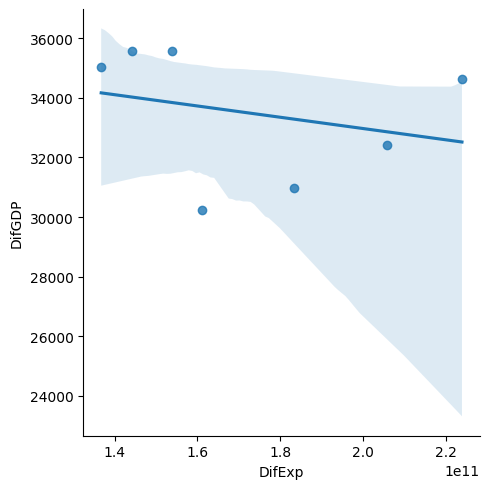

In [166]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedItExpGDP)

In [167]:
#normalization
dfItGDPn = dfItGDPt.iloc[1:]
dfItExpn = dfItExp.iloc[1:]
normalized_dfItGDP = preprocessing.normalize([dfItGDPn["DifGDP"]])
normalized_dfItExp = preprocessing.normalize([dfItExpn["DifExp"]])
normalized_dfItGDPl = list(np.concatenate(normalized_dfItGDP))
normalized_dfItExpl = list(np.concatenate(normalized_dfItExp))

In [168]:
#linear regression
X = normalized_dfItGDPl
y = normalized_dfItExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              146.3
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    1.94e-05
Time:                        17:49:31   Log-Likelihood:                          8.1975
No. Observations:                   7   AIC:                                     -14.40
Df Residuals:                       6   BIC:                                     -14.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9801      0.081     12.096      0.000       0.782       1.178
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.227
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.813
Skew:                          -0.022   Prob(JB):                        0.666
Kurtosis:                       1.331   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
#other methods of correlation

In [170]:
pearsonr(X,y)

PearsonRResult(statistic=-0.2747160915710792, pvalue=0.5510247465507974)

In [171]:
spearmanr(X,y)

SpearmanrResult(correlation=-0.5, pvalue=0.25316999510032273)

In [172]:
kendalltau(X,y)

KendalltauResult(correlation=-0.14285714285714288, pvalue=0.7726190476190476)

In [163]:
#correlation methods for Korea
#calculating annual R&D expenditure and then differences between years
Kor["R&D_Exp"] = Kor["Value"]
dfKorExp = It.groupby("Time").sum('Value').reset_index()
dfKorExp['DifExp'] = dfKorExp['R&D_Exp'].shift(1)

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\3420929936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kor["R&D_Exp"] = Kor["Value"]


In [180]:
dfKorGDP

,index,Country,Country Code,Time,GDP,DifGDP
0,3,"Korea, Rep.",KOR,2012,25466.76052,NaN
1,7,"Korea, Rep.",KOR,2013,27182.73431,25466.76052
2,11,"Korea, Rep.",KOR,2014,29249.57522,27182.73431
3,15,"Korea, Rep.",KOR,2015,28732.23108,29249.57522
4,19,"Korea, Rep.",KOR,2016,29288.87044,28732.23108
5,23,"Korea, Rep.",KOR,2017,31616.84340,29288.87044
6,27,"Korea, Rep.",KOR,2018,33436.92306,31616.84340
7,31,"Korea, Rep.",KOR,2019,31902.41690,33436.92306
8,35,"Korea, Rep.",KOR,2020,31721.29891,31902.41690


In [181]:
dfKorExp

,Time,Value,R&D_Exp,DifExp
0,2012,136717440024,136717440024,NaN
1,2013,144132099563,144132099563,1.367174e+11
2,2014,153894157944,153894157944,1.441321e+11
3,2015,161209203557,161209203557,1.538942e+11
4,2016,183241435559,183241435559,1.612092e+11
5,2017,205735959254,205735959254,1.832414e+11
6,2018,223944851837,223944851837,2.057360e+11
7,2019,233972975808,233972975808,2.239449e+11


In [183]:
#calculating differences between years
dfKorGDP = dfGDPn4.loc[dfGDPn4["Country"].isin(["Korea, Rep."])].reset_index()
dfKorGDP['DifGDP'] = dfKorGDP['GDP'].shift(1)
dfKorGDPt = dfKorGDP.loc[dfKorGDP["Time"].isin(["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"])]
#choosing same data type for merge column
dfKorGDPt["Time"]=dfKorGDPt["Time"].astype("int64")
dfKorExp["Time"]=dfKorExp["Time"].astype("int64")
#merging GDP and Exp data
mergedKorExpGDP = dfKorGDPt.merge(dfKorExp, on="Time")

C:\Users\lisar\AppData\Local\Temp\ipykernel_11816\1647039186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKorGDPt["Time"]=dfKorGDPt["Time"].astype("int64")


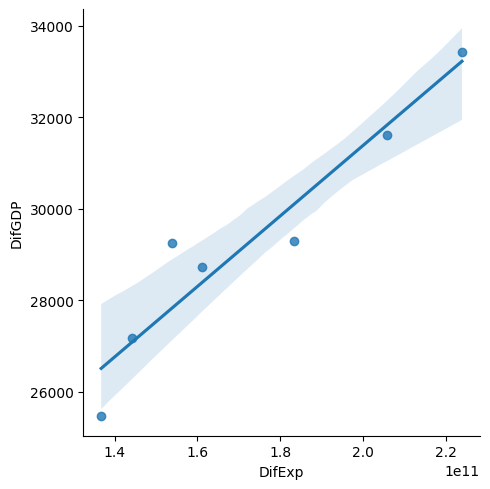

In [184]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedKorExpGDP)

In [187]:
#normalization
dfKorGDPn = dfKorGDPt.iloc[1:]
dfKorExpn = dfKorExp.iloc[1:]
normalized_dfKorGDP = preprocessing.normalize([dfKorGDPn["DifGDP"]])
normalized_dfKorExp = preprocessing.normalize([dfKorExpn["DifExp"]])
normalized_dfKorGDPl = list(np.concatenate(normalized_dfKorGDP))
normalized_dfKorExpl = list(np.concatenate(normalized_dfKorExp))

In [188]:
#linear regression
X = normalized_dfKorGDPl
y = normalized_dfKorExpl
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              625.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    2.69e-07
Time:                        17:55:46   Log-Likelihood:                          13.175
No. Observations:                   7   AIC:                                     -24.35
Df Residuals:                       6   BIC:                                     -24.40
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9952      0.040     25.009      0.000       0.898       1.093
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.295
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.858
Skew:                           0.387   Prob(JB):                        0.651
Kurtosis:                       1.470   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#other correlation methods

In [189]:
pearsonr(X,y)

PearsonRResult(statistic=0.95176131849745, pvalue=0.0009563700192338734)

In [190]:
spearmanr(X,y)

SpearmanrResult(correlation=0.9642857142857145, pvalue=0.0004541491691941689)

In [191]:
kendalltau(X,y)

KendalltauResult(correlation=0.9047619047619049, pvalue=0.002777777777777778)